In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2, ResNet50V2, mobilenet_v2,InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.preprocessing.image import load_img,  img_to_array
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path= '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/train'
val_path= '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/val'
deployment_path = '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/deployment_check'

In [3]:
os.listdir(train_path)

['hob_processed',
 'bab_processed',
 'hom_processed',
 'gro_processed',
 'pet_processed',
 'spo_processed',
 'clo_processed',
 'bea_processed',
 'ele_processed']

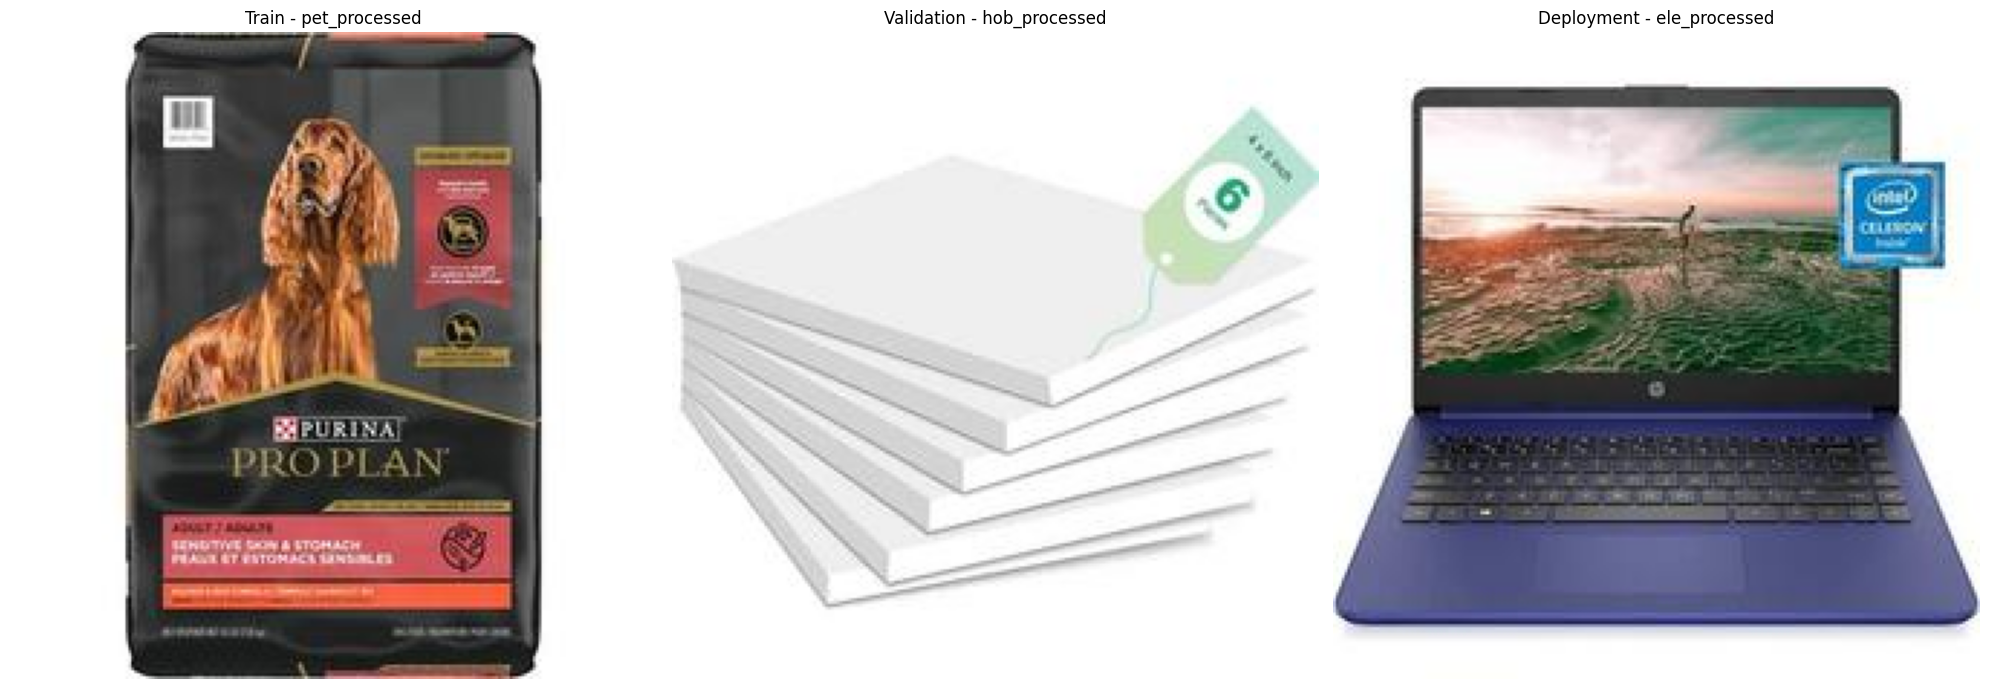

In [4]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import glob

# Define paths
train_path= '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/train'
val_path= '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/val'
deployment_path = '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/deployment_check'

# Function to load a random image from a random category using glob
def load_random_image_from_path(path):
    categories = [d for d in glob.glob(os.path.join(path, '*')) if os.path.isdir(d)]
    random_category = random.choice(categories)
    images = glob.glob(os.path.join(random_category, '*'))
    random_image = random.choice(images)
    return random_image, os.path.basename(random_category)

# Load random images from each path
train_image_path, train_category = load_random_image_from_path(train_path)
val_image_path, val_category = load_random_image_from_path(val_path)
deployment_image_path, deployment_category = load_random_image_from_path(deployment_path)

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Load and show the train image
train_img = load_img(train_image_path)
axes[0].imshow(train_img)
axes[0].set_title(f"Train - {train_category}")
axes[0].axis('off')

# Load and show the val image
val_img = load_img(val_image_path)
axes[1].imshow(val_img)
axes[1].set_title(f"Validation - {val_category}")
axes[1].axis('off')

# Load and show the deployment image
deployment_img = load_img(deployment_image_path)
axes[2].imshow(deployment_img)
axes[2].set_title(f"Deployment - {deployment_category}")
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [5]:
def count_images_in_folders(folder_path):
    # Loop through each folder path in the list
    for path in folder_path:
        # Get the list of folders (categories) in the specified path
        categories = os.listdir(path)

        # Print the path for clarity
        print(f"Path: {path}")

        # Loop through each category
        for category in categories:
            # Get the path of the category folder
            category_path = os.path.join(path, category)

            # Skip if it's not a folder
            if not os.path.isdir(category_path):
                continue

            # Count the number of image files in the category folder
            images_count = sum([1 for file in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, file))])

            # Print the category name and the number of images inside
            print(f"  Category: {category}, Image Count: {images_count}")

# Example folder_path, update it with your actual folder paths
folder_path = ["/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/train", "/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/deployment_check",'/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/val']

# Count images in each folder path
count_images_in_folders(folder_path)




Path: /kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/train
  Category: hob_processed, Image Count: 758
  Category: bab_processed, Image Count: 898
  Category: hom_processed, Image Count: 1670
  Category: gro_processed, Image Count: 3874
  Category: pet_processed, Image Count: 574
  Category: spo_processed, Image Count: 627
  Category: clo_processed, Image Count: 1042
  Category: bea_processed, Image Count: 1170
  Category: ele_processed, Image Count: 717
Path: /kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED/deployment_check
  Category: hob_processed, Image Count: 51
  Category: bab_processed, Image Count: 60
  Category: hom_processed, Image Count: 112
  Category: gro_processed, Image Count: 259
  Category: pet_processed, Image Count: 39
  Category: spo_processed, Image Count: 42
  Category: clo_processed, Image Count: 70
  Category: bea_processed, Image Count: 79
  Category: ele_processed, Image Count: 48
Pa

In [6]:
print(os.listdir(train_path+'/hom_processed')[10])
print(os.listdir(val_path+'/hom_processed')[10])

hom_527_IMEproducts.jpeg
hom_585_IMEproducts.jpeg


In [7]:
img1= imread(train_path+'/hom_processed/'+'hom_527_IMEproducts.jpeg')
img2= imread(val_path+'/hom_processed/'+'hom_585_IMEproducts.jpeg')

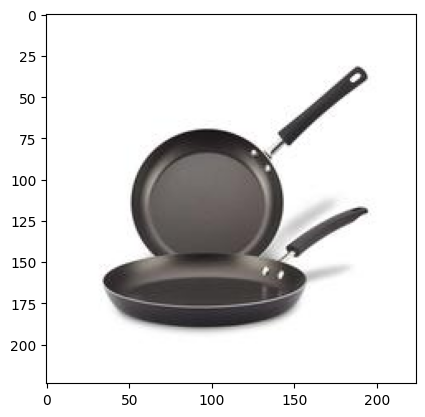

In [8]:
plt.imshow(img1)

# Mobile Net

In [9]:
# Paths to your datasets on Kaggle
folder_path = '/kaggle/input/category-prediction-for-e-commerce-images-dataset/FINAL_DATASET_SPLITTED'
train_path = os.path.join(folder_path, 'train')
val_path = os.path.join(folder_path, 'val')
check_path = os.path.join(folder_path, 'check')

In [10]:
image_gen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.05,
                               height_shift_range=0.05,
                               rescale=1/255,
                               shear_range=0.05,
                               zoom_range=0.05,
                               horizontal_flip=True,
                               fill_mode="nearest")

val_gen = ImageDataGenerator(rescale=1./255)

In [11]:
# Model parameters
img_size = (224, 224)
num_classes = 9
epochs = 10
batch_size = 32

In [12]:
# Training and validation data generators
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(224, 224),
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                class_mode="categorical",
                                                shuffle=True)

val_image_gen = val_gen.flow_from_directory(val_path,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                           shuffle = False)

Found 11330 images belonging to 9 classes.
Found 3029 images belonging to 9 classes.


In [13]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-5)

callbacks = [early_stopping, reduce_lr]

In [14]:
# Load MobileNetV2 base model (without top layers) and manually specify weights path
weights_path = '/kaggle/input/mobile-net/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights=None)
base_model.load_weights(weights_path)

# Add custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(9, activation='softmax')
])


In [15]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])



In [16]:
# Train the model
history = model.fit(train_image_gen,
                    steps_per_epoch=train_image_gen.samples // batch_size,
                    validation_data=val_image_gen,
                    validation_steps=val_image_gen.samples // batch_size,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/10
  1/354 ━━━━━━━━━━━━━━━━━━━━ 7:35:45 77s/step - accuracy: 0.2500 - loss: 2.5121

I0000 00:00:1716301082.705381     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716301082.791793     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.2926 - loss: 2.0524

W0000 00:00:1716301331.848560     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


354/354 ━━━━━━━━━━━━━━━━━━━━ 351s 775ms/step - accuracy: 0.2928 - loss: 2.0518 - val_accuracy: 0.4797 - val_loss: 1.5608 - learning_rate: 1.0000e-05
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4062 - loss: 1.6557 - val_accuracy: 0.0000e+00 - val_loss: 2.8719 - learning_rate: 1.0000e-05
Epoch 3/10


W0000 00:00:1716301363.108236     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


354/354 ━━━━━━━━━━━━━━━━━━━━ 156s 432ms/step - accuracy: 0.4965 - loss: 1.5232 - val_accuracy: 0.5608 - val_loss: 1.3122 - learning_rate: 1.0000e-05
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.5312 - loss: 1.2815 - val_accuracy: 0.0476 - val_loss: 2.5661 - learning_rate: 1.0000e-05
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 155s 430ms/step - accuracy: 0.5567 - loss: 1.3245 - val_accuracy: 0.6160 - val_loss: 1.1592 - learning_rate: 1.0000e-05
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - accuracy: 0.5312 - loss: 1.3425 - val_accuracy: 0.0952 - val_loss: 2.2958 - learning_rate: 1.0000e-05
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 154s 426ms/step - accuracy: 0.6073 - loss: 1.1751 - val_accuracy: 0.6559 - val_loss: 1.0571 - learning_rate: 1.0000e-05
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 137us/step - accuracy: 0.5938 - loss: 1.2439 - val_accuracy: 0.3333 - val_loss: 1.9699 - learning_rate: 1.0000e-05
Epoch 9/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 156s 432ms/step -

In [19]:
# Observing the training process
def plot_training_process(history):
    # Extract loss and accuracy from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

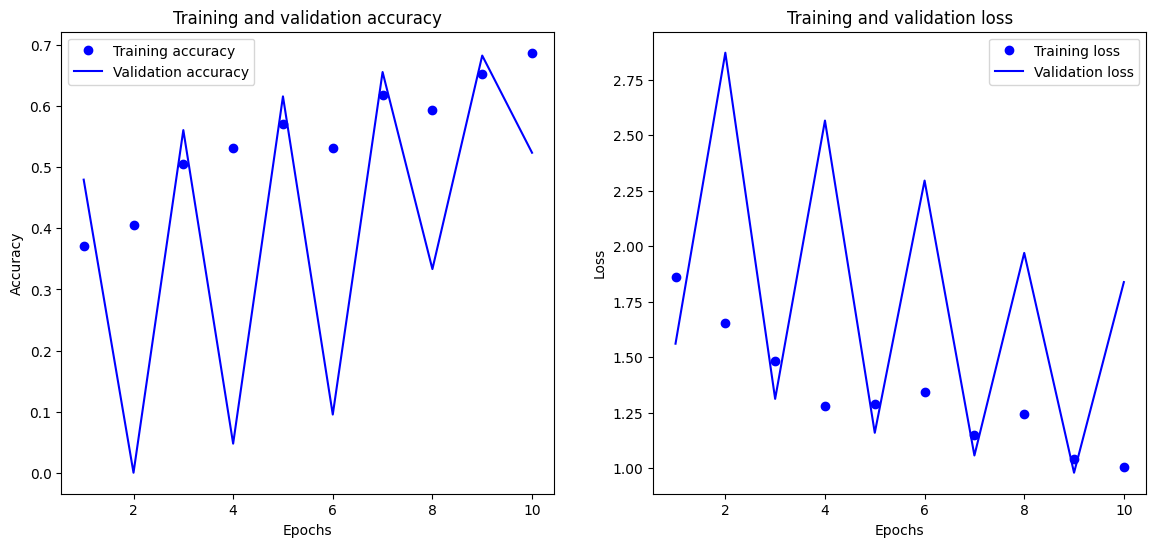

In [20]:
plot_training_process(history)

### Fine Tuning

In [27]:
# Load MobileNetV2 base model (without top layers) and manually specify weights path
weights_path = '/kaggle/input/mobile-net/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights=None)
base_model.load_weights(weights_path)

# Add custom layers on top of the base model
model_tune = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

In [28]:
from tensorflow.keras.optimizers import RMSprop
# Unfreeze the top layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True


# Recompile the model with a lower learning rate
model_tune.compile(optimizer = RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model again with the unfrozen layers
history_fine_tune = model_tune.fit(
    train_image_gen,
    validation_data=val_image_gen,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
288/355 ━━━━━━━━━━━━━━━━━━━━ 34s 522ms/step - accuracy: 0.3675 - loss: 2.3498

W0000 00:00:1716302669.129238     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


355/355 ━━━━━━━━━━━━━━━━━━━━ 241s 548ms/step - accuracy: 0.3830 - loss: 2.2548 - val_accuracy: 0.5853 - val_loss: 1.2964 - learning_rate: 1.0000e-05
Epoch 2/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 155s 429ms/step - accuracy: 0.5846 - loss: 1.2825 - val_accuracy: 0.6359 - val_loss: 1.1886 - learning_rate: 1.0000e-05
Epoch 3/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 154s 426ms/step - accuracy: 0.6410 - loss: 1.1038 - val_accuracy: 0.6765 - val_loss: 1.1021 - learning_rate: 1.0000e-05
Epoch 4/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 156s 430ms/step - accuracy: 0.6758 - loss: 0.9895 - val_accuracy: 0.6930 - val_loss: 1.0950 - learning_rate: 1.0000e-05
Epoch 5/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 156s 431ms/step - accuracy: 0.7162 - loss: 0.8718 - val_accuracy: 0.6910 - val_loss: 1.2028 - learning_rate: 1.0000e-05


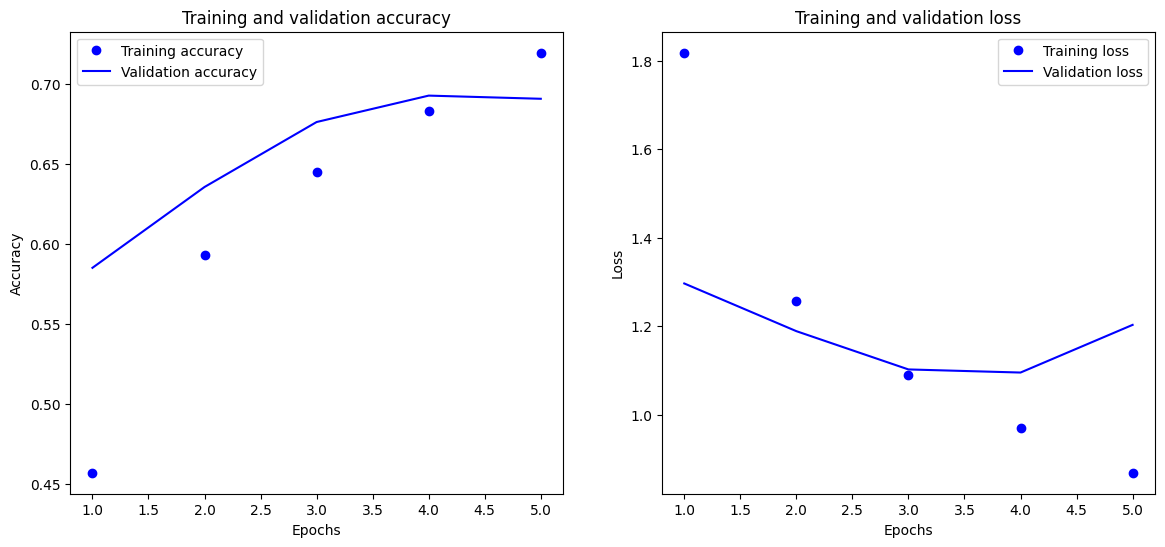

In [29]:
plot_training_process(history_fine_tune)

# InceptionV3

In [30]:
# Data augmentation and preprocessing for training
train_image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Preprocessing for validation
val_image_gen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_image_gen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_image_gen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle = False   
)


Found 11330 images belonging to 9 classes.
Found 3029 images belonging to 9 classes.


In [36]:
# Load InceptionV3 base model (without top layers) and manually specify weights path
weights_path = '/kaggle/input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = InceptionV3(input_shape=(299, 299, 3), include_top=False, weights=None)
base_model.load_weights(weights_path)

# Add custom layers on top of the base model
model_inception = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

In [38]:
# Unfreeze the top layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model_inception.compile(optimizer=RMSprop(learning_rate=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [39]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

callbacks = [early_stopping, reduce_lr]

In [40]:
# Train the model again with the unfrozen layers
history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10


W0000 00:00:1716305717.731620     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


155/355 ━━━━━━━━━━━━━━━━━━━━ 3:41 1s/step - accuracy: 0.3533 - loss: 2.1087   

W0000 00:00:1716305888.891975     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.4244 - loss: 1.8260

W0000 00:00:1716306050.466383     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716306082.910942     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


355/355 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.4247 - loss: 1.8251 - val_accuracy: 0.6794 - val_loss: 0.9945 - learning_rate: 1.0000e-05
Epoch 2/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 295s 815ms/step - accuracy: 0.6402 - loss: 1.1044 - val_accuracy: 0.7227 - val_loss: 0.8784 - learning_rate: 1.0000e-05
Epoch 3/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 297s 821ms/step - accuracy: 0.7042 - loss: 0.9038 - val_accuracy: 0.7583 - val_loss: 0.7852 - learning_rate: 1.0000e-05
Epoch 4/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 301s 832ms/step - accuracy: 0.7465 - loss: 0.7832 - val_accuracy: 0.7735 - val_loss: 0.7568 - learning_rate: 1.0000e-05
Epoch 5/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 300s 828ms/step - accuracy: 0.7866 - loss: 0.6758 - val_accuracy: 0.7864 - val_loss: 0.7325 - learning_rate: 1.0000e-05
Epoch 6/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 298s 824ms/step - accuracy: 0.8071 - loss: 0.5924 - val_accuracy: 0.7745 - val_loss: 0.8894 - learning_rate: 1.0000e-05
Epoch 7/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 299s 827ms/ste

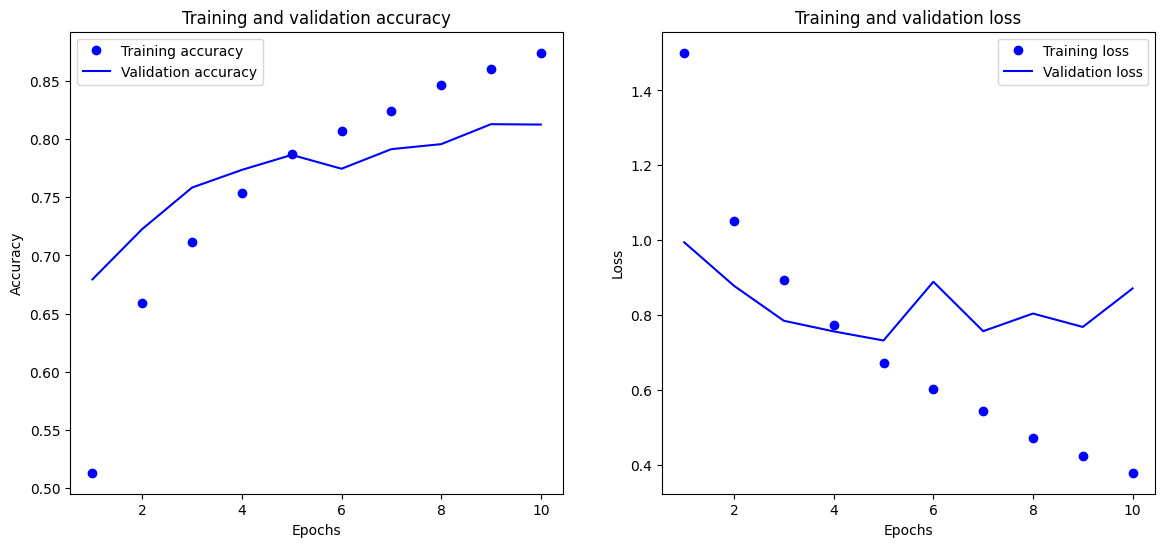

In [55]:
plot_training_process(history_inception)

In [61]:
# Var olan bir dosyanın üzerine yazmak için
model_inception.save('InceptionV3_model.h5')



ValueError: Unable to synchronously create dataset (name already exists)

## 3. Data Set

In [62]:
# Paths to your datasets on Kaggle
folder_path = '/kaggle/input/final-dataset-all/FINAL_DATASET_3_SPLITTED'
train_path = os.path.join(folder_path, 'train')
val_path = os.path.join(folder_path, 'val')
check_path = os.path.join(folder_path, 'check')

In [63]:
# Data augmentation and preprocessing for training
train_image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Preprocessing for validation
val_image_gen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_image_gen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_image_gen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle = False   
)


Found 13992 images belonging to 9 classes.
Found 3632 images belonging to 9 classes.


In [66]:
# Load InceptionV3 base model (without top layers) and manually specify weights path
weights_path = '/kaggle/input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = InceptionV3(input_shape=(299, 299, 3), include_top=False, weights=None)
base_model.load_weights(weights_path)

# Add custom layers on top of the base model
model_inception_all = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

In [67]:
# Unfreeze the top layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model_inception_all.compile(optimizer=RMSprop(learning_rate=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

callbacks = [early_stopping, reduce_lr]

In [70]:
# Train the model again with the unfrozen layers
history_inception = model_inception_all.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
  1/438 ━━━━━━━━━━━━━━━━━━━━ 10:39:12 88s/step - accuracy: 0.1250 - loss: 2.9784

W0000 00:00:1716311515.469867     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716311547.025270     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.4206 - loss: 1.7969

W0000 00:00:1716311878.007898     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716311915.828724     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 489s 918ms/step - accuracy: 0.4208 - loss: 1.7962 - val_accuracy: 0.6768 - val_loss: 0.9684 - learning_rate: 1.0000e-05
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 314s 705ms/step - accuracy: 0.6410 - loss: 1.0978 - val_accuracy: 0.7360 - val_loss: 0.8159 - learning_rate: 1.0000e-05
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 315s 708ms/step - accuracy: 0.7086 - loss: 0.9103 - val_accuracy: 0.7539 - val_loss: 0.7739 - learning_rate: 1.0000e-05
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 327s 734ms/step - accuracy: 0.7479 - loss: 0.7696 - val_accuracy: 0.7640 - val_loss: 0.7546 - learning_rate: 1.0000e-05
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 314s 705ms/step - accuracy: 0.7837 - loss: 0.6765 - val_accuracy: 0.7880 - val_loss: 0.7318 - learning_rate: 1.0000e-05
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 326s 732ms/step - accuracy: 0.7995 - loss: 0.6047 - val_accuracy: 0.7993 - val_loss: 0.7010 - learning_rate: 1.0000e-05
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 328s 738ms/

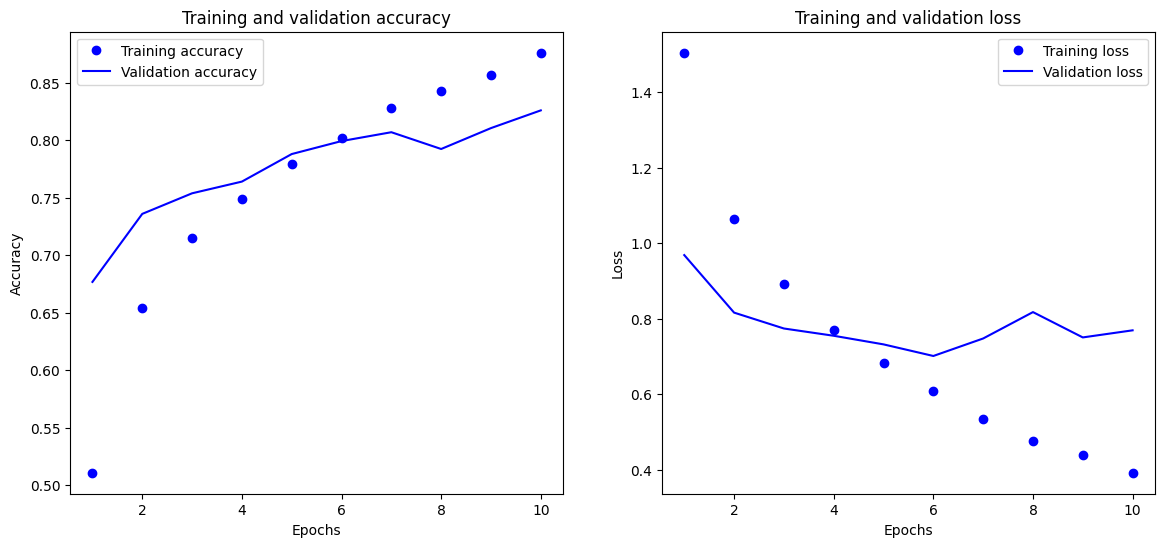

In [71]:
plot_training_process(history_inception)

In [72]:
# Save the model
model_inception_all.save('InceptionV3_model_all.h5')

ValueError: Unable to synchronously create dataset (name already exists)